In [3]:
import pandas as pd
import sklearn
import time
import numpy as np
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split
from sklearn.externals import joblib
#%%

t1 = time.time()
print('Loading database ...')
df = pd.read_hdf('database/all_data_comp.h5','table')
print('Time to load database:', time.time()-t1)
#%%

# Variable names.
import var_names
d = var_names.d

Loading database ...
Time to load database: 3.36464786529541


In [4]:
eng_13 = [d['ae1_rpm'],
          d['ae3_rpm'],
          d['me1_rpm'],
          d['me3_rpm'],
          
          d['fo_booster_13']
          ]

eng_24 = [d['ae2_rpm'],
          d['ae4_rpm'],
          d['me2_rpm'],
          d['me4_rpm'],
          d['fo_booster_24']
          ]

#%%

####
#### Training the first set with only rpm predictor
####

print('Features and predictions for training 1:\n\nEngine 1_3:')

for n in eng_13:
    print('- ',d[n])
print('\nEngine 2_4:')
for n in eng_24:
    print('- ',d[n])

print('\nDate: ',time.strftime('%y%m%d'))
print('Time: ',time.strftime('%H:%M:%S'))

Features and predictions for training 1:

Engine 1_3:
-  ae1_rpm
-  ae3_rpm
-  me1_rpm
-  me3_rpm
-  fo_booster_13

Engine 2_4:
-  ae2_rpm
-  ae4_rpm
-  me2_rpm
-  me4_rpm
-  fo_booster_24

Date:  180124
Time:  14:44:55


In [3]:

from sklearn.externals import joblib

In [6]:
# Train model
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 2
cores = -1

df_1_3 = df[eng_13].dropna()
X = np.array(df_1_3.drop(labels=d['fo_booster_13'],axis=1))
y = np.array(df_1_3[d['fo_booster_13']])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
tpot.fit(X_train, y_train.reshape(-1,))

Optimization Progress:  67%|██████▋   | 100/150 [04:34<11:10, 13.41s/pipeline]

Generation 1 - Current best internal CV score: -0.014229178935452131


Generation 2 - Current best internal CV score: -0.014229178935452131

Best pipeline: ExtraTreesRegressor(CombineDFs(input_matrix, input_matrix), bootstrap=True, max_features=0.4, min_samples_leaf=2, min_samples_split=19, n_estimators=100)


TPOTRegressor(config_dict={'sklearn.linear_model.ElasticNetCV': {'l1_ratio': array([0.  , 0.05, 0.1 , 0.15, 0.2 , 0.25, 0.3 , 0.35, 0.4 , 0.45, 0.5 ,
       0.55, 0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ]), 'tol': [1e-05, 0.0001, 0.001, 0.01, 0.1]}, 'sklearn.ensemble.ExtraTreesRegressor': {'n_estimato....3 , 0.35, 0.4 , 0.45, 0.5 , 0.55,
       0.6 , 0.65, 0.7 , 0.75, 0.8 , 0.85, 0.9 , 0.95, 1.  ])}}}},
       crossover_rate=0.1, cv=5, disable_update_check=False,
       early_stop=None, generations=2, max_eval_time_mins=5,
       max_time_mins=None, memory=None, mutation_rate=0.9, n_jobs=4,
       offspring_size=50, periodic_checkpoint_folder=None,
       population_size=50, random_state=None, scoring=None, subsample=1.0,
       verbosity=2, warm_start=False)

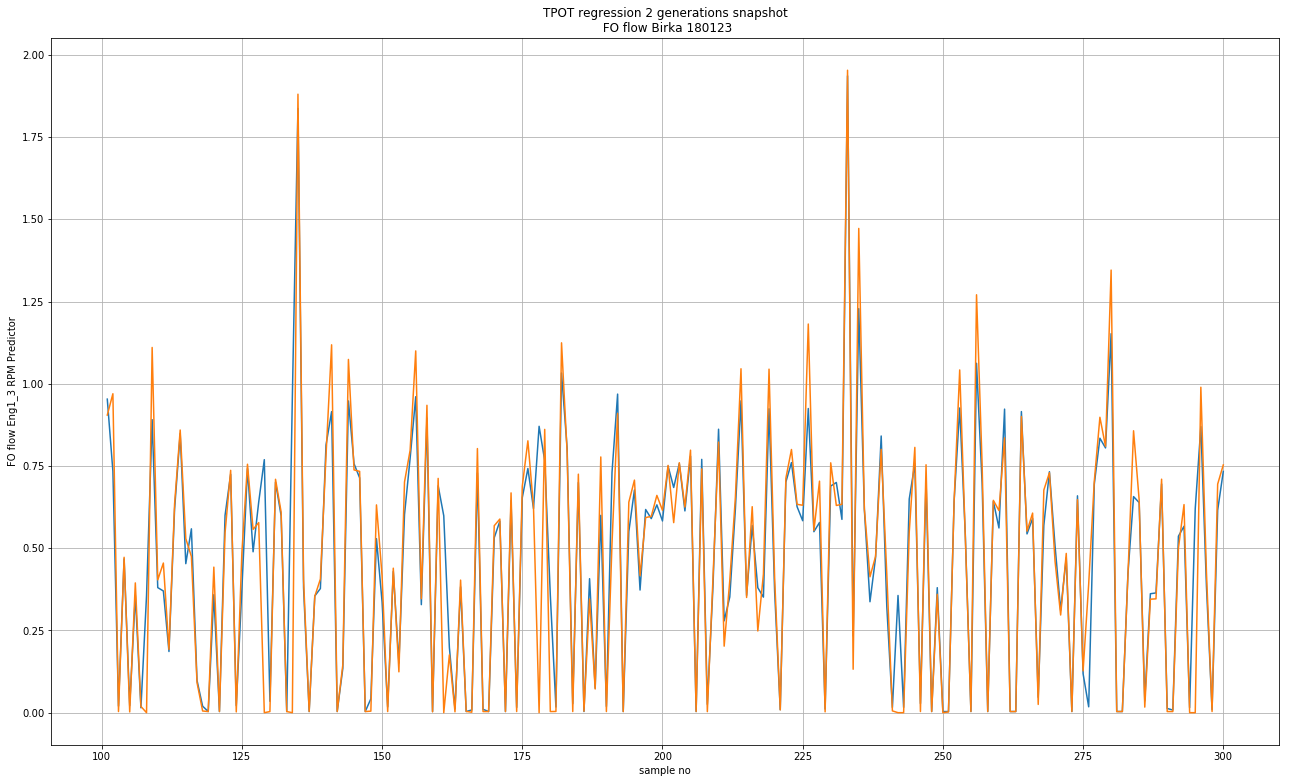

In [71]:

n1 = 100
sample_n = 200
x = linspace(n1+1,n1+sample_n,sample_n)

fig, ax = plt.subplots()

fig.set_size_inches(22, 13)

plt.plot(x,tpot.predict(X_test)[n1:n1+sample_n])
plt.plot(x,y_test[n1:n1+sample_n])

ax.set(xlabel='sample no', ylabel='FO flow Eng1_3 RPM Predictor',
       title='TPOT regression 2 generations snapshot\n FO flow Birka 180123')
ax.grid()

fig.savefig("tpot_eng13_rpm_2gen.png")
plt.show()


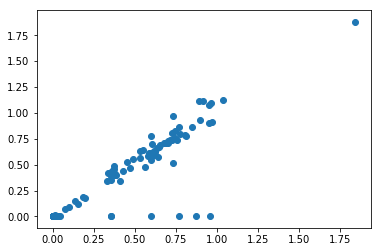

In [29]:
plt.scatter(tpot.predict(X_test)[100:200],y_test[100:200])

In [57]:
linspace(100,200)

array([100.        , 102.04081633, 104.08163265, 106.12244898,
       108.16326531, 110.20408163, 112.24489796, 114.28571429,
       116.32653061, 118.36734694, 120.40816327, 122.44897959,
       124.48979592, 126.53061224, 128.57142857, 130.6122449 ,
       132.65306122, 134.69387755, 136.73469388, 138.7755102 ,
       140.81632653, 142.85714286, 144.89795918, 146.93877551,
       148.97959184, 151.02040816, 153.06122449, 155.10204082,
       157.14285714, 159.18367347, 161.2244898 , 163.26530612,
       165.30612245, 167.34693878, 169.3877551 , 171.42857143,
       173.46938776, 175.51020408, 177.55102041, 179.59183673,
       181.63265306, 183.67346939, 185.71428571, 187.75510204,
       189.79591837, 191.83673469, 193.87755102, 195.91836735,
       197.95918367, 200.        ])

In [49]:

n2 = 200

In [44]:
sample_n1

0

In [45]:
X_test[:200]

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.76190507e-01],
       [7.48933333e+02, 0.00000000e+00, 3.69259273e+02, 5.82010607e-01],
       [7.50600000e+02, 0.00000000e+00, 3.85026471e+02, 4.76190507e-01],
       [7.50600000e+02, 0.00000000e+00, 4.07936519e+02, 4.76190507e-01],
       [7.50533333e+02, 0.00000000e+00, 3.77724876e+02, 8.88888931e-01],
       [5.50666667e+02, 7.51133333e+02, 0.00000000e+00, 0.00000000e+00],
       [7.50066667e+02, 0.00000000e+00, 0.00000000e+00, 3.76465621e+02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 6.45502667e-01],
       [7.50733333e+02, 0.00000000e+00, 0.00000000e+00, 3.82529112e+02],
       [7.50800000e+02, 0.00000000e+00, 3.80105833e+02, 6.34920657e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.86603186e+02],
       [7.50000000e+02, 0.00000000e+00, 0.00000000e+00, 4.03693138e+02],
       [7.50133333e+02, 0.00000000e+00, 0.00000000e+00, 4.76190507e-01],
       [0.00000000e+00, 7.50666667e+02, 0.00000000e

In [6]:
#More predictors

eng_13 = [d['ae1_rpm'],
          d['ae3_rpm'],
          d['me1_rpm'],
          d['me3_rpm'],
          d['ae1_frp'],
          d['ae3_frp'],
          d['me1_frp'],
          d['me3_frp'],
          d['ae1_exh_T'],
          d['ae3_exh_T'],
          d['me1_exh_T'],
          d['me3_exh_T'],
          d['fo_booster_13']
          ]

eng_24 = [d['ae2_rpm'],
          d['ae4_rpm'],
          d['me2_rpm'],
          d['me4_rpm'],
          d['ae2_frp'],
          d['ae4_frp'],
          d['me2_frp'],
          d['me4_frp'],
          d['ae2_exh_T'],
          d['ae4_exh_T'],
          d['me2_exh_T'],
          d['me4_exh_T'],
          d['fo_booster_24']
          ]

#%%

####
#### Training the first set with only rpm predictor
####

print('Features and predictions for training 2:\n\nEngine 1_3:')

for n in eng_13:
    print('- ',d[n])
print('\nEngine 2_4:')
for n in eng_24:
    print('- ',d[n])

print('\nDate: ',time.strftime('%y%m%d'))
print('Time: ',time.strftime('%H:%M:%S'))

Features and predictions for training 2:

Engine 1_3:
-  ae1_rpm
-  ae3_rpm
-  me1_rpm
-  me3_rpm
-  ae1_frp
-  ae3_frp
-  me1_frp
-  me3_frp
-  ae1_exh_T
-  ae3_exh_T
-  me1_exh_T
-  me3_exh_T
-  fo_booster_13

Engine 2_4:
-  ae2_rpm
-  ae4_rpm
-  me2_rpm
-  me4_rpm
-  ae2_frp
-  ae4_frp
-  me2_frp
-  me4_frp
-  ae2_exh_T
-  ae4_exh_T
-  me2_exh_T
-  me4_exh_T
-  fo_booster_24

Date:  180125
Time:  09:05:00


In [ ]:
# Train model
from tpot import TPOTRegressor
from sklearn.model_selection import train_test_split

gen = 2
cores = -1

df_1_3 = df[eng_13].dropna()
X = np.array(df_1_3.drop(labels=d['fo_booster_13'],axis=1))
y = np.array(df_1_3[d['fo_booster_13']])

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, test_size=0.25)
tpot = TPOTRegressor(generations=gen, population_size=50, verbosity=2, n_jobs=cores)
tpot.fit(X_train, y_train.reshape(-1,))

Optimization Progress:   0%|          | 0/150 [00:00<?, ?pipeline/s]